# INSURANCE PRICE PREDICTION

## Problem Statement

Building a data model using machine learning that can predict the premium insurance charge based on age, gender, BMI (Body Mass Index), family condition (number of children), region and smoking habit.

## Data Definition

Age: The Age of the policyholder
    
Sex: The Gender of the policyholder
    
BMI: The Body Mass Index of the Policyholder
    
Children: Number of Children of the Policyholder
    
Smoker: A Column whether the Policyholder is Smoker or No Smoker
    
Region: The Region where the Policyholder belongs to which region
    
Charges: The Premium Charged to the Policyholder

## Importing Libraries

In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

## Set options

In [2]:
# setting the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# displaying all columns of the dataframe
pd.options.display.max_columns = None

# displaying all rows of the dataframe
pd.options.display.max_rows = None

# using the below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

## Read Data

In [4]:
# reading the data file
df_insurance=pd.read_csv(r"D:\PGA11\Capstone Project\insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Prepare and analyse the data

In [5]:
# Dimensions of the data
df_insurance.shape

(1338, 7)

There are 1338 rows and 7 columns.

### Data type

In [6]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Summary statistics

In [7]:
# By default the describe function returns the summary of numerical variables
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df_insurance.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Detecting the outliers

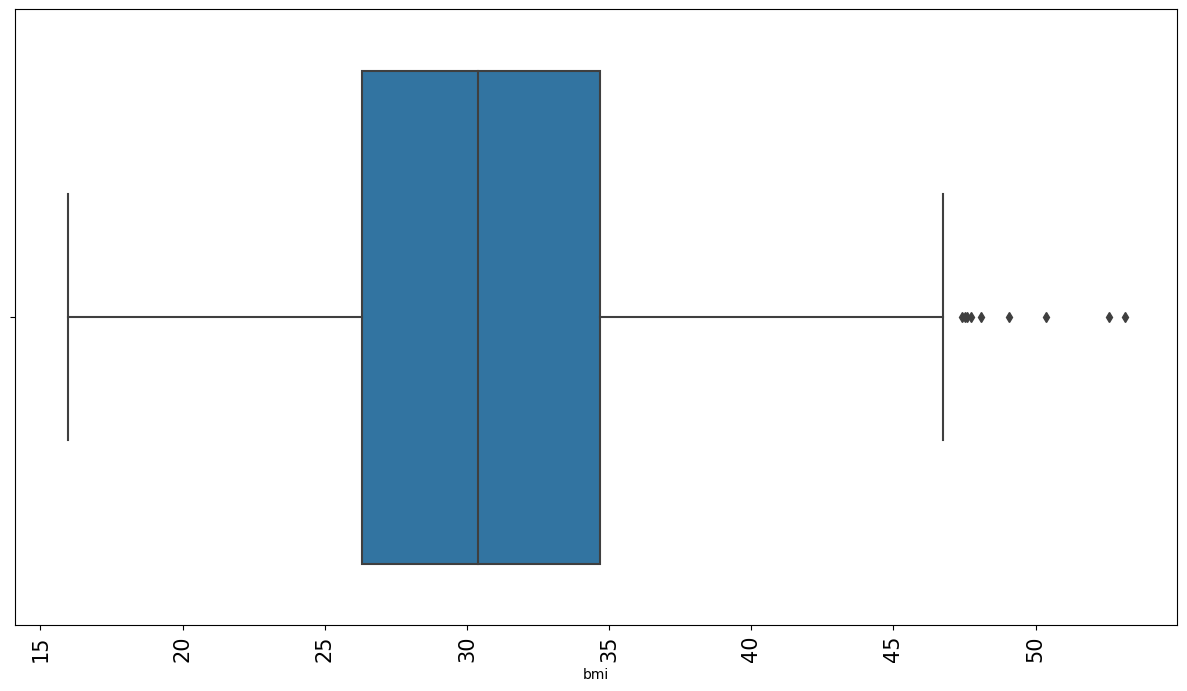

In [9]:
# plotting boxplot for "bmi"
sns.boxplot(df_insurance['bmi'])

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

We can find some outliers present in the data. Generally, outliers badly affect the prediction of the regression model and thus, we will remove these outliers.

In [10]:
df_insurance = df_insurance[df_insurance['bmi'] < 45]
df_insurance.shape

(1318, 7)

<AxesSubplot:xlabel='bmi'>

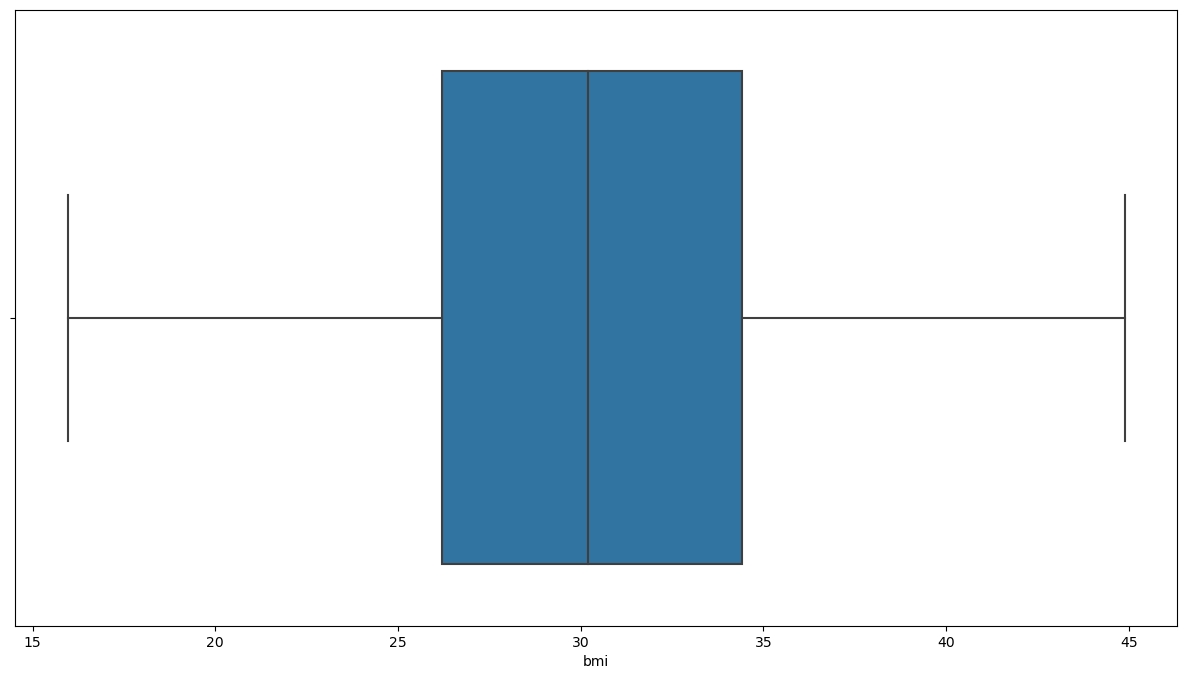

In [11]:
sns.boxplot(df_insurance['bmi'])

<AxesSubplot:xlabel='charges'>

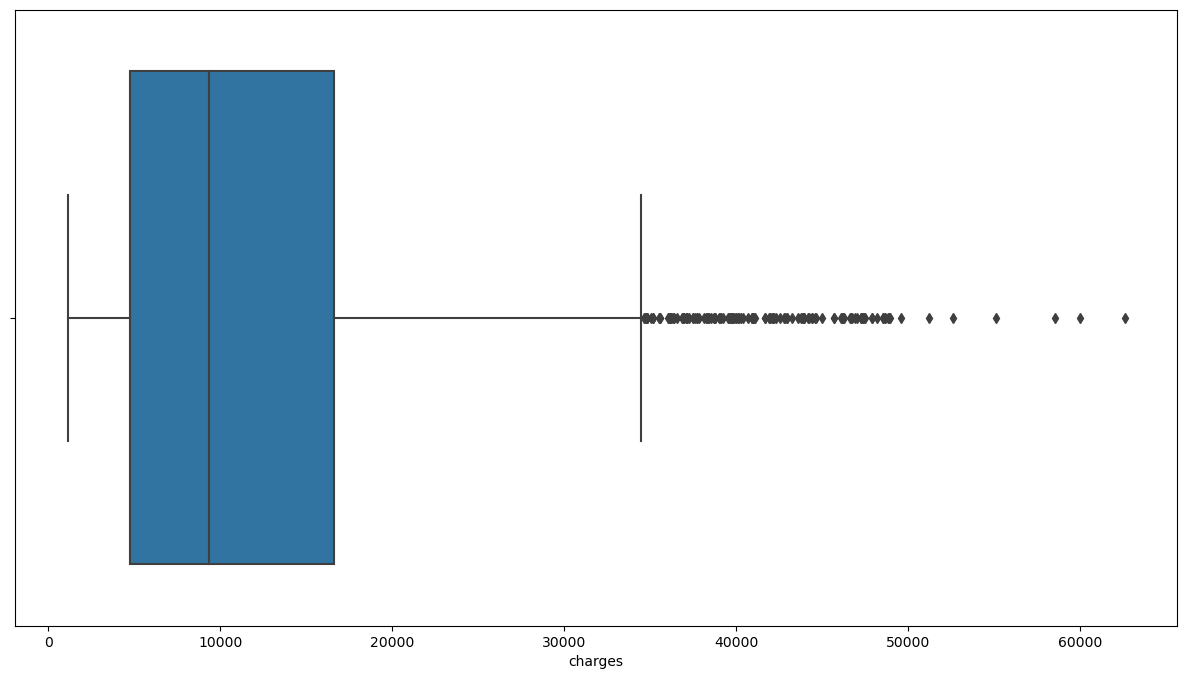

In [12]:
sns.boxplot(df_insurance['charges'])

In [13]:
df_insurance = df_insurance[df_insurance['charges'] < 22000]
df_insurance.shape

(1084, 7)

<AxesSubplot:xlabel='charges'>

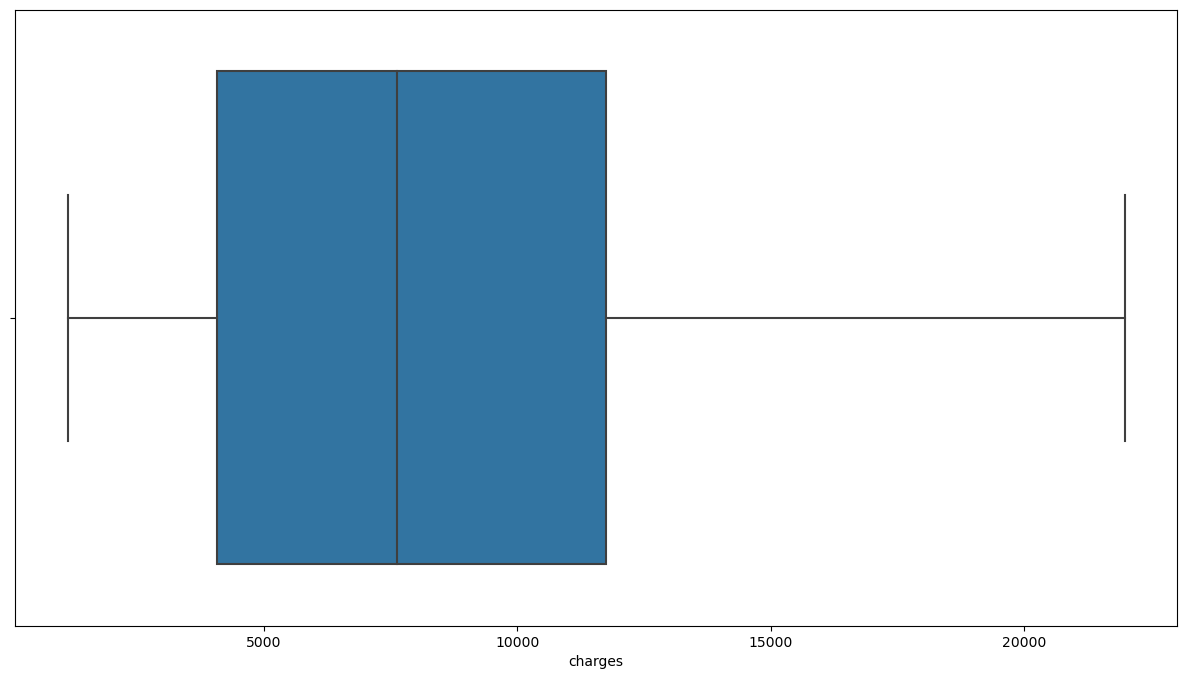

In [14]:
sns.boxplot(df_insurance['charges'])

Hence the outliers from the dataset are removed.

### Missing values

In [15]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Correlation

In [16]:
# using the corr() function to generate the correlation matrix of numeric variables
corrmat=df_insurance.corr()
corrmat

,age,bmi,children,charges
age,1.000000,0.154329,0.036551,0.545094
bmi,0.154329,1.000000,-0.011965,-0.034723
children,0.036551,-0.011965,1.000000,0.122115
charges,0.545094,-0.034723,0.122115,1.000000


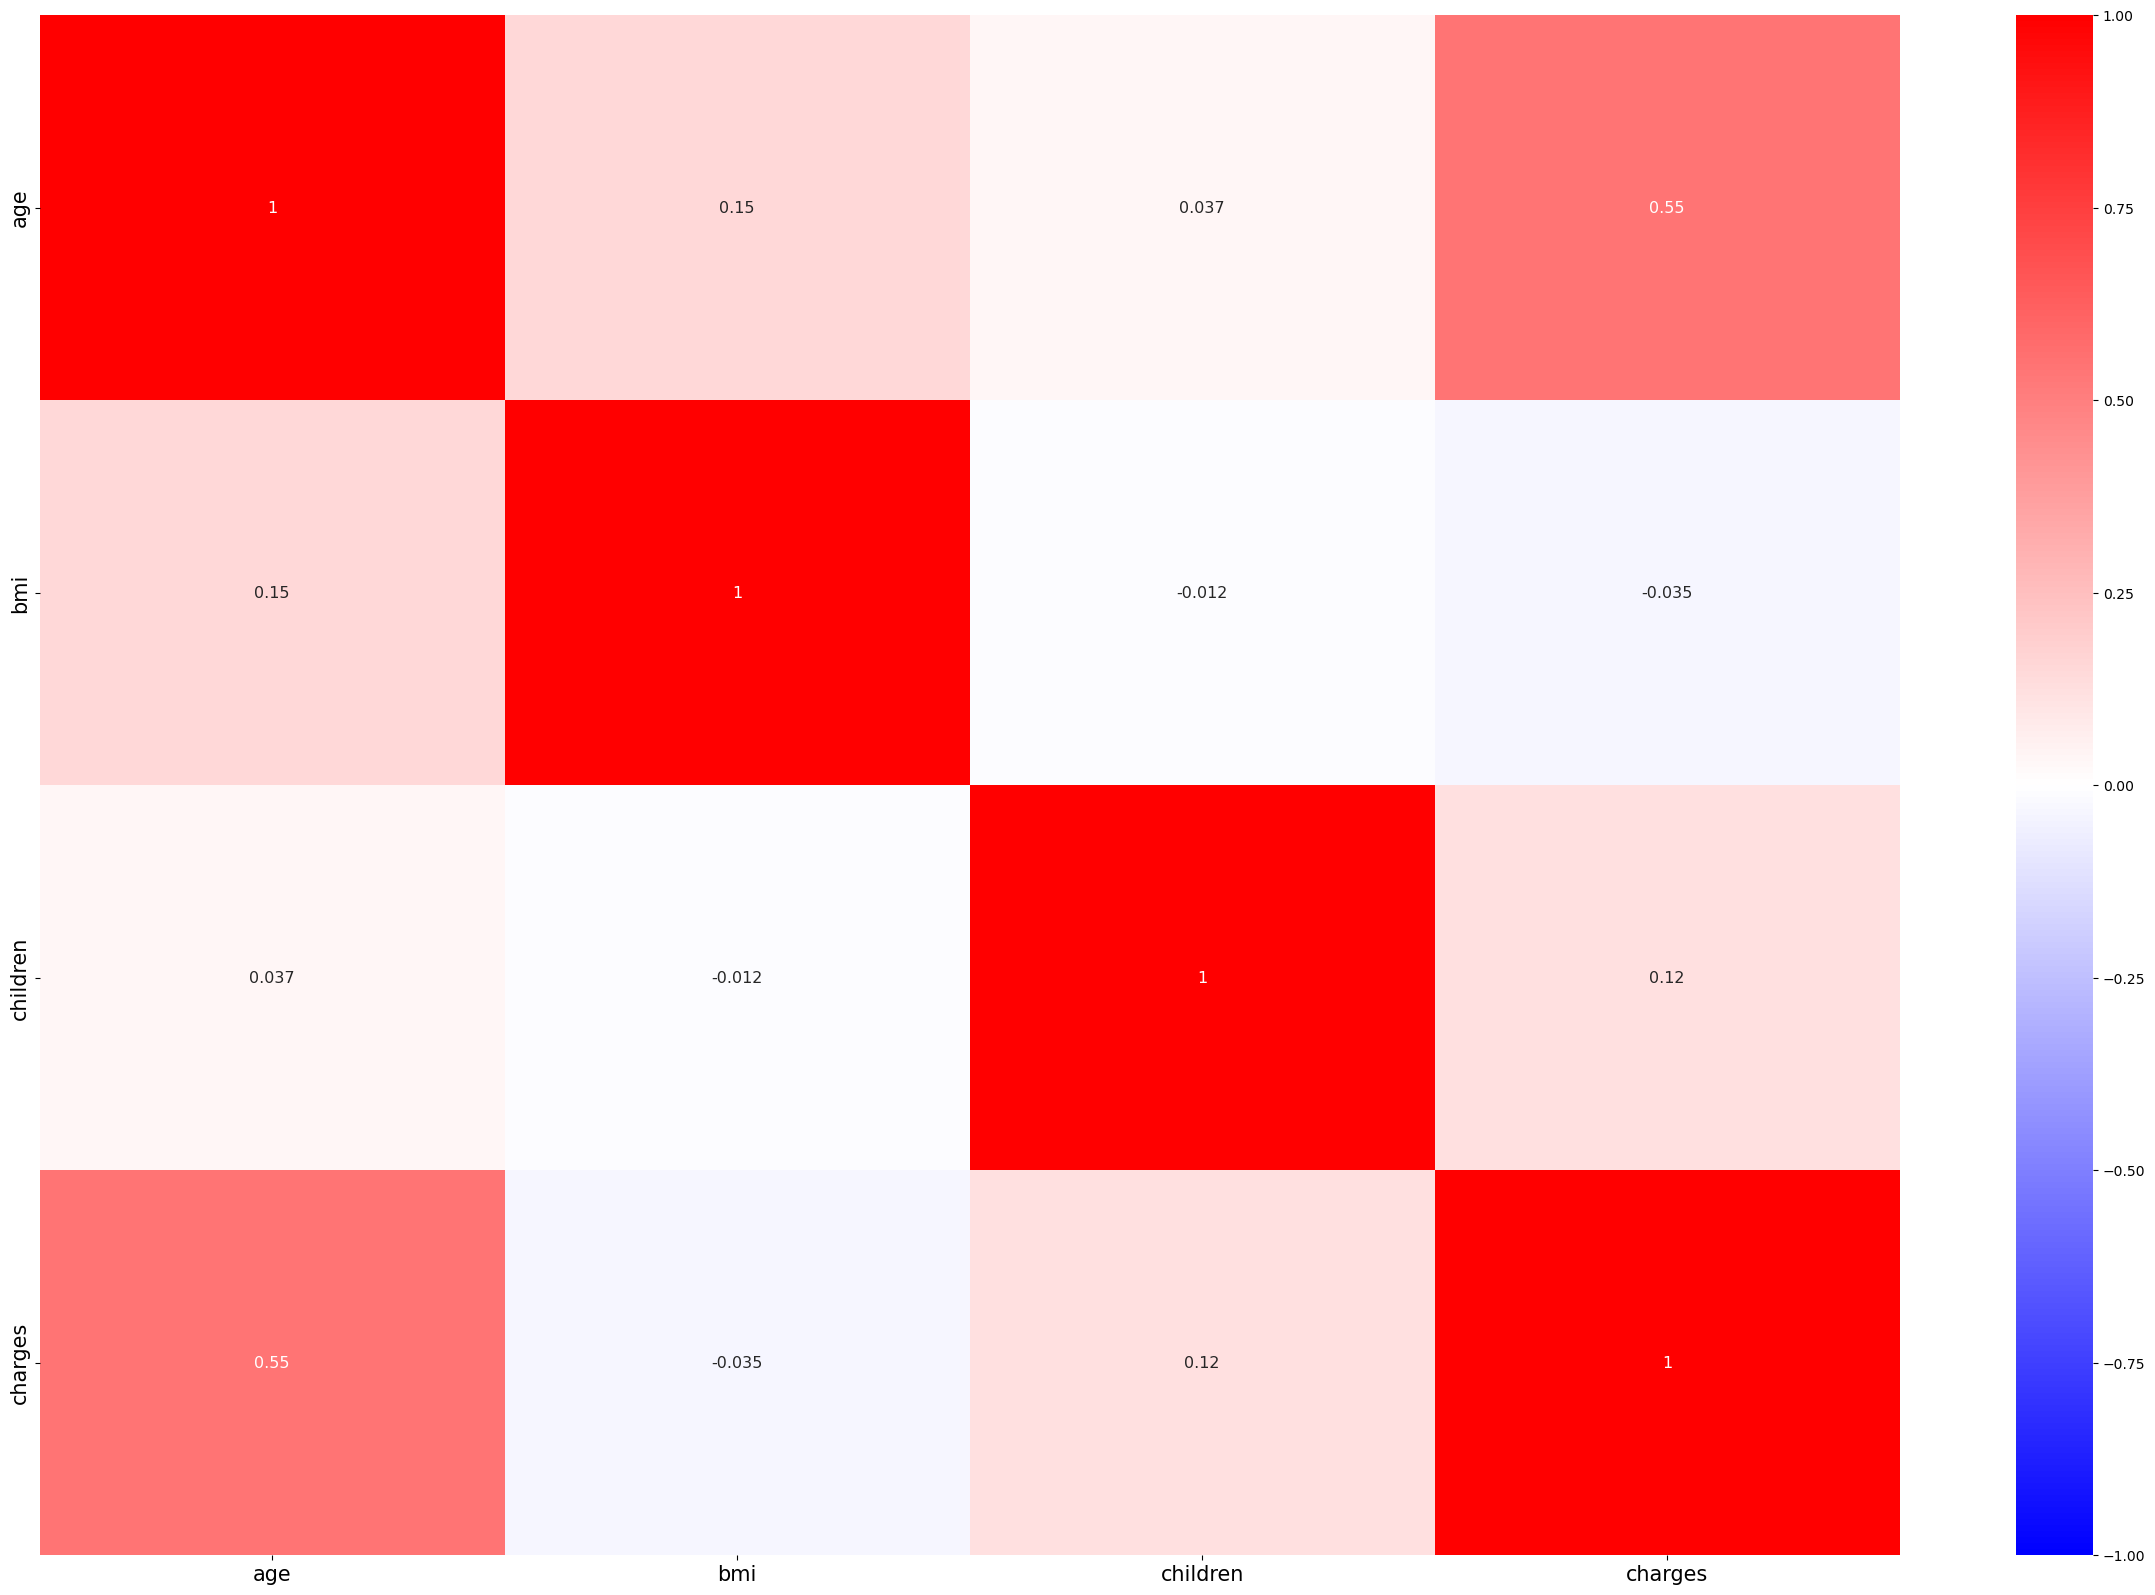

In [17]:
# plotting corrmat using heatmap
plt.figure(figsize = (30,20))

sns.heatmap(corrmat, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

### Data visualization

<AxesSubplot:xlabel='charges', ylabel='Count'>

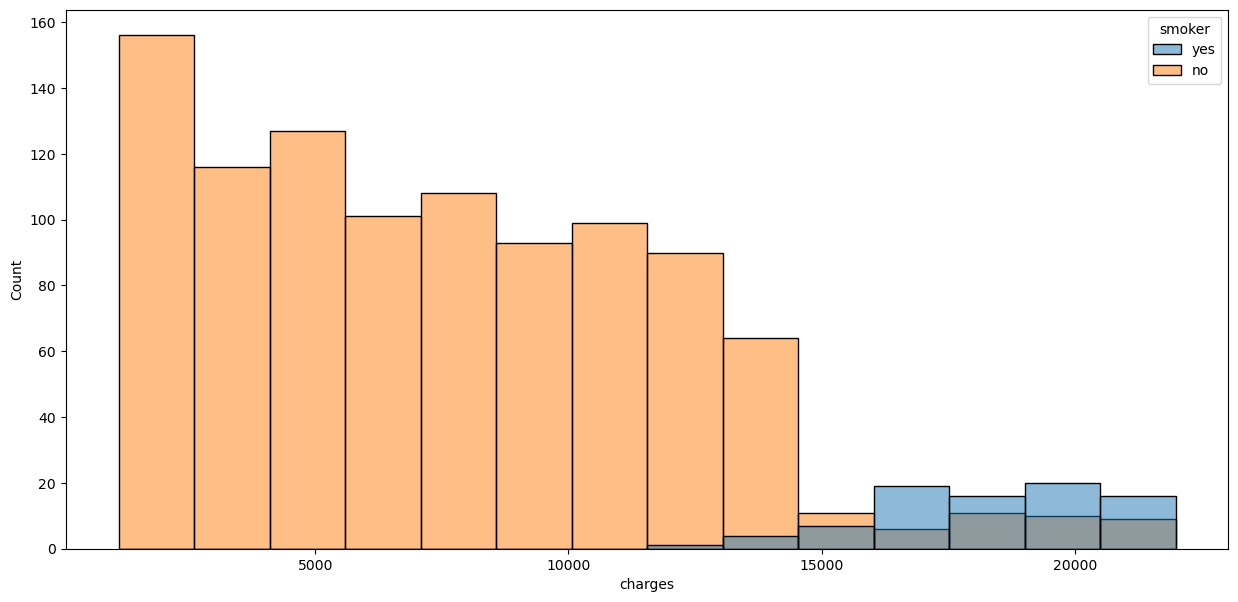

In [18]:
plt.figure(figsize=(15,7))
sns.histplot(data=df_insurance, x='charges', hue='smoker')

Charges column seems to have a positive skew. Most people have charges under 17k. Smokers seem to have higher charges.

<AxesSubplot:xlabel='smoker', ylabel='count'>

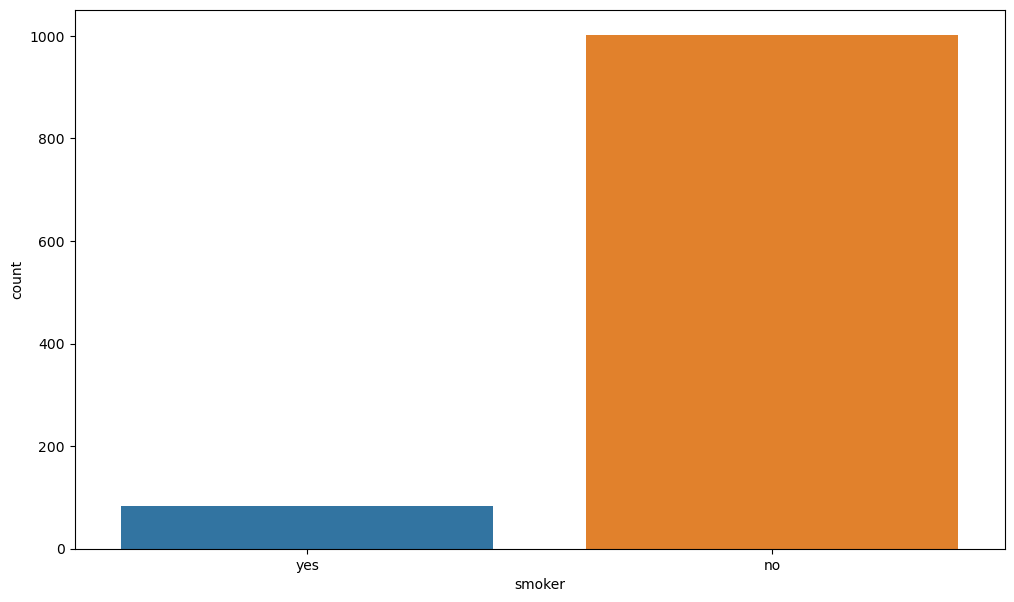

In [19]:
# Visualizing smoker column
plt.figure(figsize=(12,7))
sns.countplot(x=df_insurance.smoker)

<AxesSubplot:xlabel='smoker', ylabel='count'>

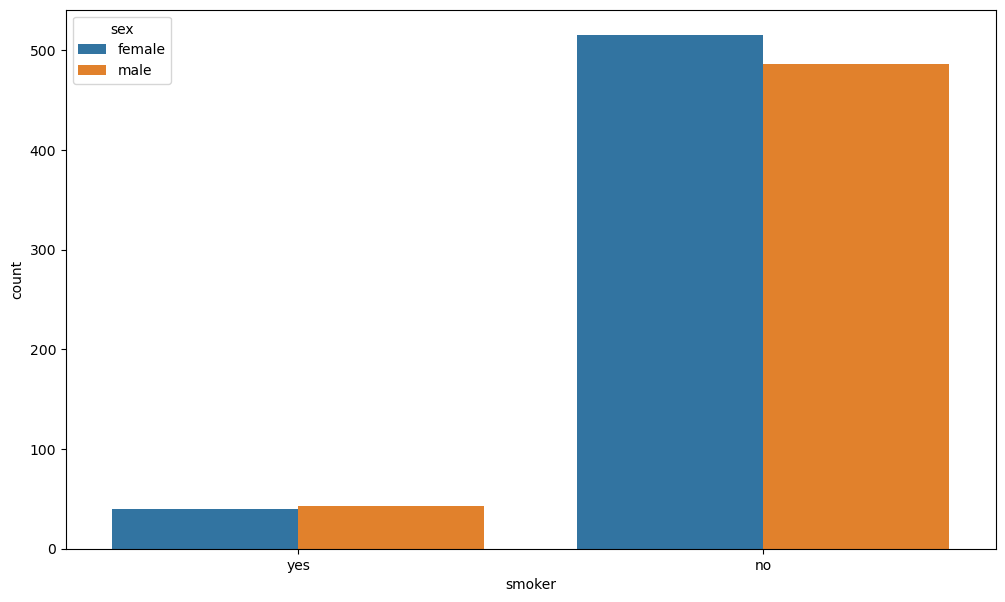

In [20]:
# Visualizing by smoker by sex
plt.figure(figsize=(12,7))
sns.countplot(x=df_insurance.smoker, hue=df_insurance.sex)

### Checking normality

<AxesSubplot:xlabel='charges', ylabel='Density'>

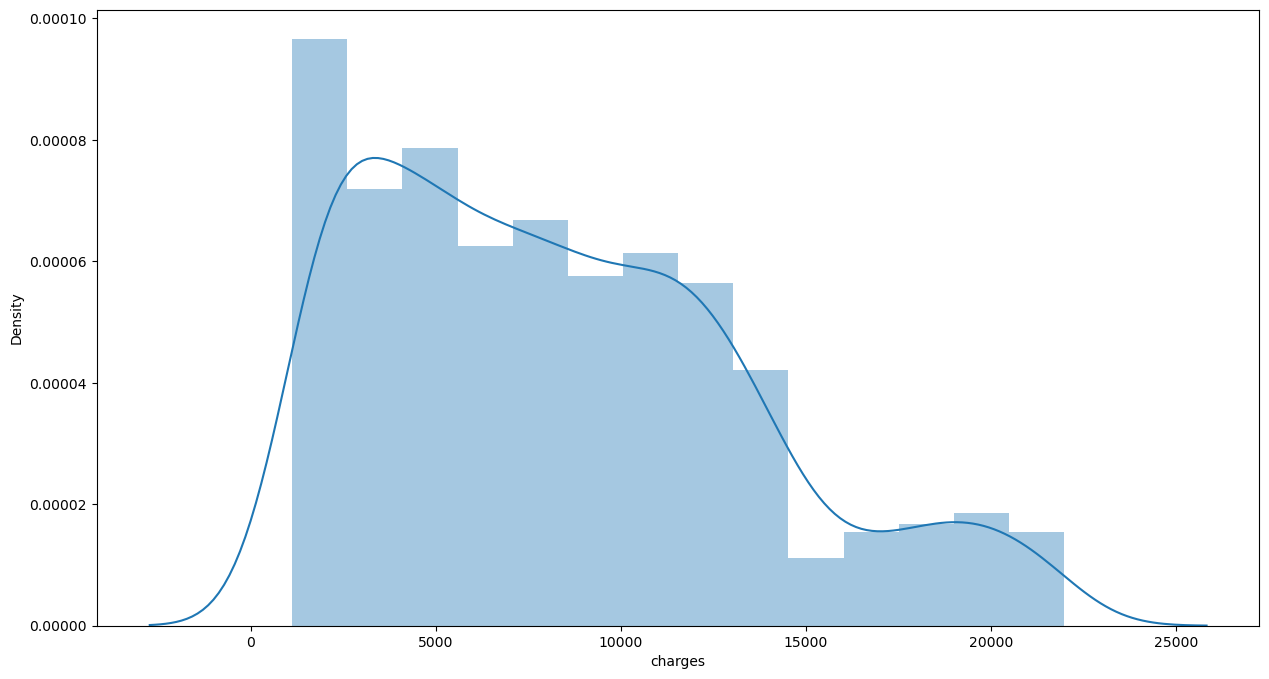

In [21]:
sns.distplot(df_insurance['charges'])

We can see that the variable 'charges' is positively skewed and thus we can say that it is not normally distributed.

In [22]:
df_insurance['log_charges'] = np.log(df_insurance.charges)

In [23]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


### Distribtuion of variables

In [24]:
# considering only the numeric variables using include=np.number
df_numeric_features = df_insurance.select_dtypes(include=np.number)

df_numeric_features.columns

Index(['age', 'bmi', 'children', 'charges', 'log_charges'], dtype='object')

In [25]:
# considering only the categorical variables using (include=object)
df_categoric_features = df_insurance.select_dtypes(include = object)

df_categoric_features.columns

Index(['sex', 'smoker', 'region'], dtype='object')

### Dummy encoding categorical variables

In [26]:
dummy_encoding = pd.get_dummies(df_categoric_features, drop_first = True)
dummy_encoding.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [27]:
# concatenating the numerical and dummy encoded categorical variables column-wise
df_insurance_dummy = pd.concat([df_numeric_features, dummy_encoding], axis=1)

df_insurance_dummy.head()

,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,0,1,0,0,1
1,18,33.770,1,1725.55230,7.453302,1,0,0,1,0
2,28,33.000,3,4449.46200,8.400538,1,0,0,1,0
3,33,22.705,0,21984.47061,9.998092,1,0,1,0,0
4,32,28.880,0,3866.85520,8.260197,1,0,1,0,0


In [28]:
df_insurance_dummy.shape

(1084, 10)

## Model Building

In [29]:
df_insurance_dummy = sm.add_constant(df_insurance_dummy)

# separating the independent and dependent variables
X = df_insurance_dummy.drop(['charges','log_charges'], axis = 1)
y = df_insurance_dummy[['charges','log_charges']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (758, 9)
y_train (758, 2)
X_test (326, 9)
y_test (326, 2)


## Linear Regression Model with Log Transformed Dependent Variable

In [236]:
# Building a model using OLS()
linear_log_model = sm.OLS(y_train['log_charges'], X_train).fit()

print(linear_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     351.4
Date:                Sun, 21 May 2023   Prob (F-statistic):          1.25e-247
Time:                        18:43:05   Log-Likelihood:                -238.98
No. Observations:                 758   AIC:                             496.0
Df Residuals:                     749   BIC:                             537.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0039      0.076  

From the above summary, we can see that the value of Durbin-Watson is 2.04. Generally, the Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation.

In [237]:
linear_log_model_predictions = linear_log_model.predict(X_test)

The predicted values are log transformed. In order to get Charges values, we take the antilog of these predicted values by using the function np.exp()

In [238]:
predicted_charges = np.exp(linear_log_model_predictions)

# Extracting the 'Charges' values from the test data
actual_charges= y_test['charges']

Computing accuracy measures like Root-mean-square-error(RMSE), R-squared and Adjusted R-squared.

In [239]:
linear_log_model_rmse = rmse(actual_charges, predicted_charges)

linear_log_model_rsquared = linear_log_model.rsquared

linear_log_model_rsquared_adj = linear_log_model.rsquared_adj 

In [240]:
# Creating result table for all accuracy scores
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

linear_logmodel_metrics = pd.Series({'Model': "Linear model with log of target variable ",
                     'RMSE':linear_log_model_rmse,
                     'R-Squared': linear_log_model_rsquared,
                     'Adj. R-Squared': linear_log_model_rsquared_adj     
                   })

result_tabulation = result_tabulation.append(linear_logmodel_metrics, ignore_index = True)

result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linear model with log of target variable,3479.336579,0.789633,0.787386


## Linear Regression Model without Log Transformed Dependent Variable

In [241]:
linear_model = sm.OLS(y_train['charges'], X_train).fit()

print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     255.7
Date:                Sun, 21 May 2023   Prob (F-statistic):          2.48e-208
Time:                        18:43:08   Log-Likelihood:                -7050.9
No. Observations:                 758   AIC:                         1.412e+04
Df Residuals:                     749   BIC:                         1.416e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3075.6525    609.335  

In [242]:
linear_model_predictions = linear_model.predict(X_test)

In [243]:
linear_model_rmse = rmse(actual_charges, linear_model_predictions)

linear_model_rsquared = linear_model.rsquared

linear_model_rsquared_adj = linear_model.rsquared_adj 

In [244]:
# appending the result table
linear_model_metrics = pd.Series({'Model': "Linear model without log of target variable ",
                     'RMSE':linear_model_rmse,
                     'R-Squared': linear_model_rsquared,
                     'Adj. R-Squared': linear_model_rsquared_adj     
                   })

result_tabulation = result_tabulation.append(linear_model_metrics, ignore_index = True)

result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linear model with log of target variable,3479.336579,0.789633,0.787386
1,Linear model without log of target variable,2728.450181,0.731977,0.729115


## Decision tree model

In [245]:
df_insurance_dummy.shape

(1084, 11)

In [246]:
b = pd.DataFrame(df_insurance_dummy['charges'])

In [247]:
b.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [248]:
a = df_insurance_dummy.drop(['charges'], axis = 1)

In [249]:
a.head()

,const,age,bmi,children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,27.900,0,9.734176,0,1,0,0,1
1,1.0,18,33.770,1,7.453302,1,0,0,1,0
2,1.0,28,33.000,3,8.400538,1,0,0,1,0
3,1.0,33,22.705,0,9.998092,1,0,1,0,0
4,1.0,32,28.880,0,8.260197,1,0,1,0,0


In [250]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.20, random_state=10)

print("X_train ",X_train.shape)

print("X_test ",X_test.shape)

print("y_train ",y_train.shape)

print("y_test ",y_test.shape)

X_train  (867, 10)
X_test  (217, 10)
y_train  (867, 1)
y_test  (217, 1)


In [251]:
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=10)  
decision_tree_model.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=5, random_state=10)

In [252]:
decision_tree_model_predictions = decision_tree_model.predict(X_test)

In [253]:
# computing the R-Squared
r_squared_dt= decision_tree_model.score(X_train,y_train)
n = 758
p = 10

# Computing Adj-R-Squared
adj_r_squared_dt = 1 - (1-r_squared_dt)*(n-1)/(n-p-1)

# Computing RMSE
rmse_dt = sqrt(mean_squared_error(y_test, decision_tree_model_predictions))

In [254]:
decision_tree_metrics = pd.Series({'Model': "Decision Tree",
                     'RMSE':rmse_dt,
                     'R-Squared':r_squared_dt,
                     'Adj. R-Squared': adj_r_squared_dt     
                   })

result_tabulation = result_tabulation.append(decision_tree_metrics, ignore_index = True)

result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linear model with log of target variable,3479.336579,0.789633,0.787386
1,Linear model without log of target variable,2728.450181,0.731977,0.729115
2,Decision Tree,190.328118,0.998819,0.998803


## Random forest model

In [255]:
rf_model = RandomForestRegressor(n_estimators=30, random_state=10)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=10)

In [256]:
rf_model_predictions = rf_model.predict(X_test)

In [257]:
r_squared_rf= rf_model.score(X_train,y_train)
n = 758
p = 10

# Computing Adj-R-Squared
adj_r_squared_rf = 1 - (1-r_squared_rf)*(n-1)/(n-p-1)

# Computing RMSE
rmse_rf = sqrt(mean_squared_error(y_test, rf_model_predictions))

In [258]:
adj_r_squared_rf

0.999993542255537

In [259]:
rf_metrics = pd.Series({'Model': "Random Forest",
                     'RMSE':rmse_rf,
                     'R-Squared':r_squared_rf,
                     'Adj. R-Squared': adj_r_squared_rf    
                   })

result_tabulation = result_tabulation.append(rf_metrics, ignore_index = True)

result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linear model with log of target variable,3479.336579,0.789633,0.787386
1,Linear model without log of target variable,2728.450181,0.731977,0.729115
2,Decision Tree,190.328118,0.998819,0.998803
3,Random Forest,26.881692,0.999994,0.999994


### From the above table, we can see that Random forest has better performed in predicting the insurance charges. 